## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Tugas Dibimbing GC/Day 18/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observasi :
1. Tidak ada null values
2. Perlu analisa lebih lanjut terlebih dahulu
3. Ada keanehan di kolom TotalCharges dimana nilainya seharusnya numerik, akan kita coba convert analisis dan coba bersihkan

## Data Analysis

In [5]:
#kita coba jalankan kode ini  df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
#ternyata muncul error ValueError: Unable to parse string " " at position 488

In [6]:
df['TotalCharges'][488]

' '

Ternyata ada data yang berupa spasi, sekarang kita cek ada berapa spasi di dataframe kita dengan cara mengubah ke null values lalu kita check kembali menggunakan .info

In [7]:
df_a = df.replace(r'^\s*$', np.nan, regex=True)
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari dataframe diatas diketahui bahwa ada 11 row data yang tidak memiliki informasi totalcharges (hanya spasi), secara logika seharusnya total charges ini adalah tenure di kali dengan monthly charges, tapi setelah mencoba mencocokan dengan beberapa customer, total charges tidak selalu persis nilainya dengan monthly charges dikalikan tenure, karena kita tidak dapat mengklarifikasi dataframe ini dengan sumbernya dan jumlah row yang bermasalah hanya sedikit maka sebaiknya kita hilangkan saja row yang bermasalah tsb.

In [8]:
df_a=df_a.dropna()
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Sekarang kita coba convert kembali TotalCharges menjadi Numeric

In [9]:
df_a["TotalCharges"] = pd.to_numeric(df_a["TotalCharges"])
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Kita cek apakah ada duplikat

In [10]:
df.duplicated().sum()

0

Sekarang data sudah bisa kita analisis lebih lanjut

In [11]:
categoricals = ['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
numericals = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [12]:
df_a[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


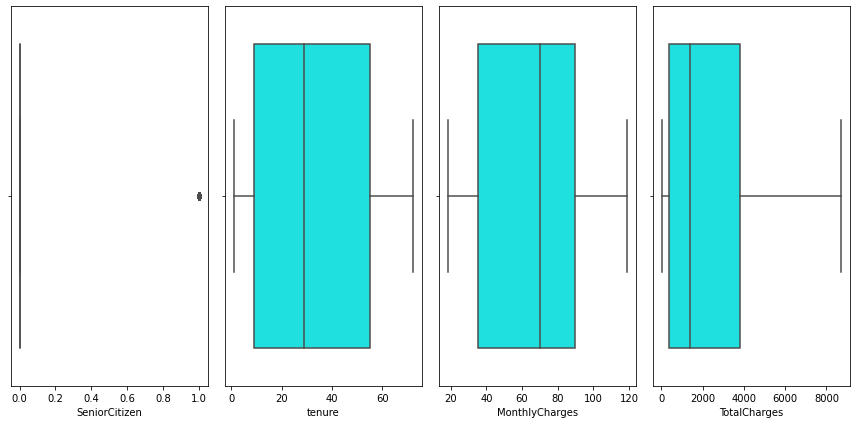

In [13]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(df_a[features[i]], color='cyan')
    plt.tight_layout()

Observasi:
1. Kolom berisikan data numerik sudah terlihat baik (walaupun tidak terdistribusi normal) karena tidak ada outlier

In [14]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df_a[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

Observasi : 
1. Kolom customerID berisikan data unik tiap customer, untuk keperluan machine learning kolom ini tidak terlalu berguna dan sebaiknya kita hapus saja nanti, untuk memastikan data customer di dataframe ini unik kita coba cek dengan kode di bawah ini
2. Kolom lain tidak ada masalah, untuk keperluan machine learning tinggal kita encode kolom-kolom lain tersebut
3. Kolom target (Churn) tidak balance datanya antara no dan yes, sehingga perlu dilakukan balancing agar machine learning dapat bekerjan dengan baik.

## Data Preprocessing

Berdasarkan analisis diatas perlu dilakukan proses ke dataframe sebagai berikut:
1. Hapus kolom customer ID
2. Encoding kolom kategorikal
3. Data Balancing

In [15]:
df.duplicated(subset=['customerID']).any()

False

jadi setiap row data di dataframe ini sudah benar untuk satu customer unik, dan kolom ini kita hapus karena tidak relate dengan machine learning

In [16]:
df_a.pop('customerID')
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [17]:
categoricals.remove('customerID')

In [18]:
# One Hot Encoding
df_prep =pd.get_dummies(data=df_a,columns=categoricals,drop_first=True)
df_prep.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [19]:
# data balancing
sm = SMOTE(random_state=42)

X = df_prep.drop(['Churn_Yes'],axis = 1)
Y = df_prep['Churn_Yes']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7032, 30)
Shape of X after SMOTE: (10326, 30)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Churn_Yes, dtype: float64

In [20]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn_Yes, dtype: int64

In [21]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

## Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)


#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#XGBOOST
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)



XGBClassifier(random_state=42)

## Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [23]:
#KNN
y_pred_knn = knn.predict(X_test)
print('Confusion Matrix KNN =\n', confusion_matrix(y_test, y_pred_knn))
print('Akurasi KNN',accuracy_score(y_test, y_pred_knn))

#Logistic Regression
y_pred_reg = logreg.predict(X_test)
print('Confusion Matrix Logistic Regression =\n', confusion_matrix(y_test, y_pred_reg))
print('Akurasi Logistic Regression',accuracy_score(y_test, y_pred_reg))

#Decision Tree
y_pred_dt = dt.predict(X_test)
print('Confusion Matrix Decision Tree =\n', confusion_matrix(y_test, y_pred_dt))
print('Akurasi Decision Tree',accuracy_score(y_test, y_pred_dt))

#Random Forest
y_pred_rf = rf.predict(X_test)
print('Confusion Matrix Random Forest =\n', confusion_matrix(y_test, y_pred_rf))
print('Akurasi Random Forest',accuracy_score(y_test, y_pred_rf))

#XGBOOST
y_pred_xgb = xgb_model.predict(X_test)
print('Confusion Matrix XGBOOST =\n', confusion_matrix(y_test, y_pred_reg))
print('Akurasi XGBOOST',accuracy_score(y_test, y_pred_xgb))


Confusion Matrix KNN =
 [[ 944  360]
 [ 236 1042]]
Akurasi KNN 0.7691711851278079
Confusion Matrix Logistic Regression =
 [[1043  261]
 [ 191 1087]]
Akurasi Logistic Regression 0.8249419054996127
Confusion Matrix Decision Tree =
 [[1004  300]
 [ 249 1029]]
Akurasi Decision Tree 0.7873741285824942
Confusion Matrix Random Forest =
 [[1074  230]
 [ 192 1086]]
Akurasi Random Forest 0.836560805577072
Confusion Matrix XGBOOST =
 [[1043  261]
 [ 191 1087]]
Akurasi XGBOOST 0.8280402788536019


Kesimpulan:
1. Model terbaik adalah Random Forest
2. Kita belum melakukan hyperparameter tuning apapun terhadap model diatas
3. Melihat hasil diatas dimana logistic regression menghasilkan nilai yang cukup baik dapat diasumsikan solusi dari dataset ini berupa solusi linear
4. Walaupun dataset ini memiliki solusi linear, random forest tetap menghasilkan nilai yang lebih baik, kemungkinan karena decision tree ataupun random forest dapat mengatasi colinearity lebih baik daripada logistic regression
5. Random forest lebih baik daripada decision tree karena random forest adalah pengembangan dari decision tree yang dapat mengatasi overfitting lebih baik daripada decision tree.
6. XGBOOST hasilnya kurang baik dibandingkan random forest, padahal ini adalah metode Machine learning terbaru pengembangan dari random forest, kemungkinan hal ini terjadi karena XGBOOST di sini belum di tuning atau karena masih dalam tahap experimental